In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
from datetime import time

In [2]:
df = pd.read_csv("pulsar_stars.csv")
print(df.shape)
df.head()

(17898, 9)


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [4]:
X = df.drop(['target_class'],axis=1) # all rows, no label
y = df['target_class']  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
# Not Scaler
x_train = X_train
x_test = X_test

In [5]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [6]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred_tr = tree.predict(x_test)

In [8]:
#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy score:',accuracy_score(y_test,y_pred_tr))

accuracy score: 0.9713966480446927


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tr))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4070
           1       0.84      0.85      0.84       405

    accuracy                           0.97      4475
   macro avg       0.91      0.92      0.91      4475
weighted avg       0.97      0.97      0.97      4475



Text(33.0, 0.5, 'Truth')

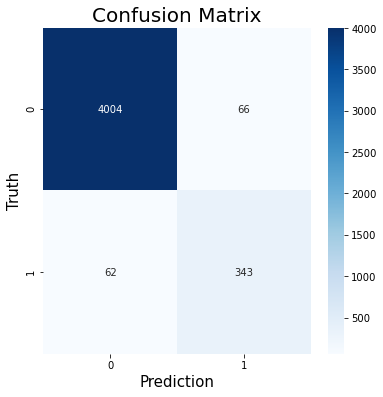

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))
lg_matrix = confusion_matrix(y_test, y_pred_tr)
sns.heatmap(lg_matrix, cmap="Blues", fmt='.16g', annot=True)
plt.title('Confusion Matrix',fontweight=500,fontsize=20,color='black')
plt.xlabel('Prediction',fontsize=15)
plt.ylabel('Truth',fontsize=15)

[[4004   66]
 [  62  343]]


Text(33.0, 0.5, 'Truth')

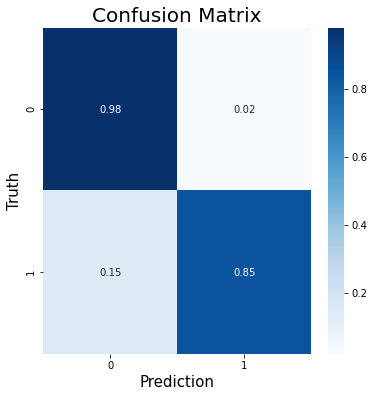

In [11]:
cm = confusion_matrix(y_test, y_pred_tr)

print(cm)
plt.figure(figsize=(6,6))
cm_normalized = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],2)
sns.heatmap(cm_normalized, cmap="Blues", fmt='.16g', annot=True)
plt.title('Confusion Matrix',fontweight=500,fontsize=20,color='black')
plt.xlabel('Prediction',fontsize=15)
plt.ylabel('Truth',fontsize=15)

## Random Forest

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [100, 200, 300, 400], 'n_jobs': [-1]}

model_rfc = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
model_rfc.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [13]:
y_pred_rfc = model_rfc.predict(x_test)
#Accuracy score
print('accuracy score:',accuracy_score(y_test,y_pred_rfc))

accuracy score: 0.9794413407821229


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4070
           1       0.94      0.83      0.88       405

    accuracy                           0.98      4475
   macro avg       0.96      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



Text(33.0, 0.5, 'Truth')

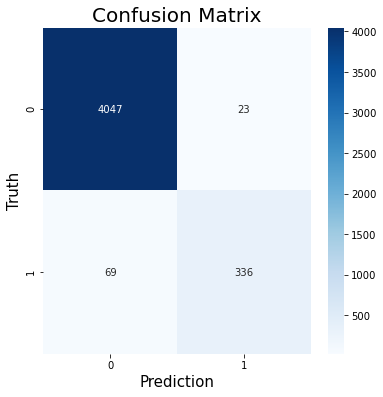

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))
lg_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(lg_matrix, cmap="Blues", fmt='.16g', annot=True)
plt.title('Confusion Matrix',fontweight=500,fontsize=20,color='black')
plt.xlabel('Prediction',fontsize=15)
plt.ylabel('Truth',fontsize=15)

[[4047   23]
 [  69  336]]


Text(33.0, 0.5, 'Truth')

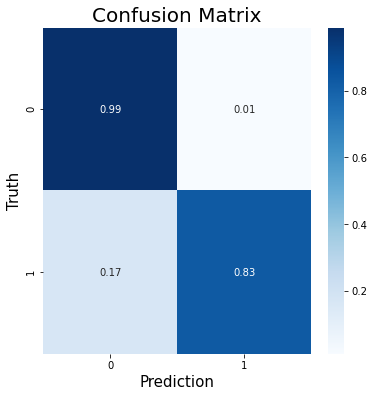

In [16]:
cm = confusion_matrix(y_test, y_pred_rfc)

print(cm)
plt.figure(figsize=(6,6))
cm_normalized = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],2)
sns.heatmap(cm_normalized, cmap="Blues", fmt='.16g', annot=True)
plt.title('Confusion Matrix',fontweight=500,fontsize=20,color='black')
plt.xlabel('Prediction',fontsize=15)
plt.ylabel('Truth',fontsize=15)

## SVM

In [18]:
from sklearn import svm

param_grid = {'C': range(28,31)}

grid_svm = GridSearchCV(svm.SVC(probability=True), 
                    param_grid, 
                    cv=3, 
                    scoring='accuracy')

grid_svm = grid_svm.fit(x_train, y_train)

model_svm = grid_svm.best_estimator_
model_svm.fit(x_train, y_train)

SVC(C=30, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
y_pred_svm = model_svm.predict(x_test)
#Accuracy score
print('accuracy score:',accuracy_score(y_test,y_pred_svm))

accuracy score: 0.9767597765363129


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4070
           1       0.94      0.79      0.86       405

    accuracy                           0.98      4475
   macro avg       0.96      0.89      0.92      4475
weighted avg       0.98      0.98      0.98      4475



Text(33.0, 0.5, 'Truth')

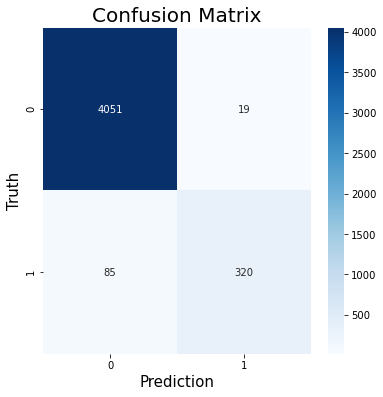

In [21]:
plt.figure(figsize=(6,6))
lg_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(lg_matrix, cmap="Blues", fmt='.16g', annot=True)
plt.title('Confusion Matrix',fontweight=500,fontsize=20,color='black')
plt.xlabel('Prediction',fontsize=15)
plt.ylabel('Truth',fontsize=15)

[[4051   19]
 [  85  320]]


Text(33.0, 0.5, 'Truth')

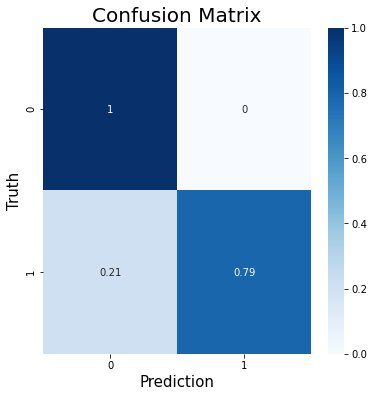

In [22]:
cm = confusion_matrix(y_test, y_pred_svm)

print(cm)
plt.figure(figsize=(6,6))
cm_normalized = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],2)
sns.heatmap(cm_normalized, cmap="Blues", fmt='.16g', annot=True)
plt.title('Confusion Matrix',fontweight=500,fontsize=20,color='black')
plt.xlabel('Prediction',fontsize=15)
plt.ylabel('Truth',fontsize=15)

## Neural Network

In [23]:
#import the keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [24]:
#Initialising the ANN
classifier=Sequential()
#Adding the input and first hidden layer
classifier.add(Dense(units=7,kernel_initializer='uniform',activation='relu',input_dim=8))
#Adding the second hidden layer
classifier.add(Dense(units=7,kernel_initializer='uniform',activation='relu'))
#Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
#Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Fitting the ANN to the training set
classifier.fit(x_train,y_train,batch_size=10,epochs=100)

W0605 15:25:30.603541 13748 deprecation.py:506] From C:\Users\wenle\scoop\apps\python37\current\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W0605 15:25:30.721226 13748 deprecation.py:323] From C:\Users\wenle\scoop\apps\python37\current\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0605 15:25:32.432333 13748 module_wrapper.py:139] From C:\Users\wenle\scoop\apps\python37\current\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_var

Epoch 1/100
13423/13423 [==============================] - 3s 229us/step - loss: 0.1500 - accuracy: 0.9493
Epoch 2/100
13423/13423 [==============================] - 2s 150us/step - loss: 0.0898 - accuracy: 0.9750
Epoch 3/100
13423/13423 [==============================] - 2s 148us/step - loss: 0.0889 - accuracy: 0.9744
Epoch 4/100
13423/13423 [==============================] - 2s 160us/step - loss: 0.0883 - accuracy: 0.9755
Epoch 5/100
13423/13423 [==============================] - 2s 154us/step - loss: 0.0878 - accuracy: 0.9748
Epoch 6/100
13423/13423 [==============================] - 2s 163us/step - loss: 0.0868 - accuracy: 0.9747
Epoch 7/100
13423/13423 [==============================] - 2s 158us/step - loss: 0.0874 - accuracy: 0.9750
Epoch 8/100
13423/13423 [==============================] - 2s 167us/step - loss: 0.0861 - accuracy: 0.9749
Epoch 9/100
13423/13423 [==============================] - 2s 163us/step - loss: 0.0853 - accuracy: 0.9757
Epoch 10/100
13423/13423 [===========

In [25]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

In [26]:
#Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy score:',accuracy_score(y_test,y_pred))

accuracy score: 0.9794413407821229


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4070
           1       0.94      0.83      0.88       405

    accuracy                           0.98      4475
   macro avg       0.96      0.91      0.93      4475
weighted avg       0.98      0.98      0.98      4475



Text(33.0, 0.5, 'Truth')

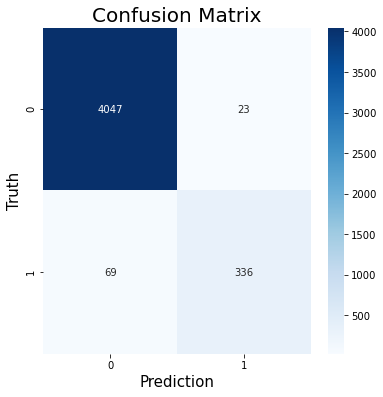

In [28]:
plt.figure(figsize=(6,6))
lg_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(lg_matrix, cmap="Blues", fmt='.16g', annot=True)
plt.title('Confusion Matrix',fontweight=500,fontsize=20,color='black')
plt.xlabel('Prediction',fontsize=15)
plt.ylabel('Truth',fontsize=15)
# plt.savefig('lgconmatrix')

[[4047   23]
 [  69  336]]


Text(33.0, 0.5, 'Truth')

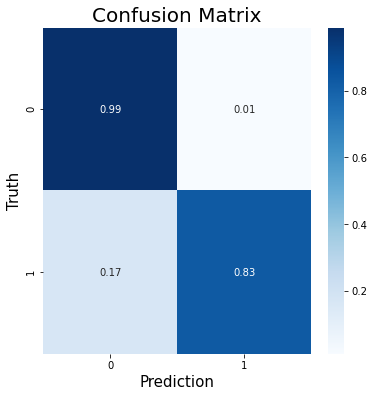

In [29]:
cm = confusion_matrix(y_test, y_pred)

print(cm)
plt.figure(figsize=(6,6))
cm_normalized = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],2)
sns.heatmap(cm_normalized, cmap="Blues", fmt='.16g', annot=True)
plt.title('Confusion Matrix',fontweight=500,fontsize=20,color='black')
plt.xlabel('Prediction',fontsize=15)
plt.ylabel('Truth',fontsize=15)

## ROC

In [30]:
fpr_list=[]
tpr_list=[]
auc_list=[]

In [31]:
# Tree
fpr_tr, tpr_tr, _ = roc_curve(y_test, tree.predict_proba(x_test)[:,1])
roc_auc_tr = roc_auc_score(y_test, tree.predict(x_test))
fpr_list.append(fpr_tr)
tpr_list.append(tpr_tr)
auc_list.append(roc_auc_tr)

# Random Forest
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, model_rfc.predict_proba(x_test)[:,1])
roc_auc_rfc = roc_auc_score(y_test, model_rfc.predict(x_test))
fpr_list.append(fpr_rfc)
tpr_list.append(tpr_rfc)
auc_list.append(roc_auc_rfc)

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, model_svm.predict_proba(x_test)[:,1])
roc_auc_svm = roc_auc_score(y_test, model_svm.predict(x_test))
fpr_list.append(fpr_svm)
tpr_list.append(tpr_svm)
auc_list.append(roc_auc_svm)

# ANN
fpr_nn, tpr_nn, _ = roc_curve(y_test, classifier.predict_proba(x_test)[:,0])
roc_auc_nn = roc_auc_score(y_test, classifier.predict(x_test))
fpr_list.append(fpr_nn)
tpr_list.append(tpr_nn)
auc_list.append(roc_auc_nn)

Text(0, 0.5, 'TPR')

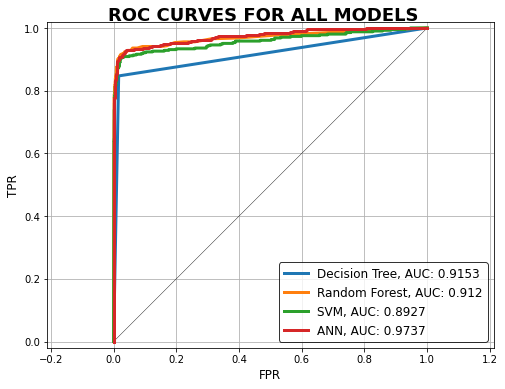

In [32]:
model_names = ['Decision Tree', 'Random Forest', 'SVM', 'ANN']

# Plot ROC curves with AUC in labels
fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle('ROC CURVES FOR ALL MODELS', fontweight='bold', fontsize='18', y=.915)
ax.plot([0, 1], [0, 1], color='k', linestyle='-', linewidth=.4)

for i in range(len(model_names)):
    fpr = fpr_list[i]
    tpr = tpr_list[i]
    label = model_names[i] + ', AUC: ' + str(round(auc_list[i],4))
    ax.plot(fpr, tpr, lw='3', label=label)
    
ax.axis('equal')
ax.set(xlim=[-.02, 1.02], ylim=[-.02, 1.02])

ax.legend(loc='best', fontsize='12', frameon=True, edgecolor='k')
ax.grid(True)
ax.set_xlabel('FPR', fontsize='12')
ax.set_ylabel('TPR', fontsize='12')

In [33]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 7)                 63        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
